# Task 3: Car Price Prediction using ML

Importing required libraries

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

Reading the data

In [64]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [65]:
data.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Data preprocessing 

In [66]:
for i in data["doornumber"]:
    if i == "two":
        data["doornumber"] = data["doornumber"].replace("two", 2)
    else:
        data["doornumber"] = data["doornumber"].replace("four", 4)

In [67]:

print(data["cylindernumber"].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [68]:
for i in data["cylindernumber"]:
    if i == "two":
        data["cylindernumber"] = data["cylindernumber"].replace("two", 2)
    elif i == "three":
        data["cylindernumber"] = data["cylindernumber"].replace("three", 3)
    elif i == "four":
        data["cylindernumber"] = data["cylindernumber"].replace("four", 4)
    elif i == "five":
        data["cylindernumber"] = data["cylindernumber"].replace("five", 5)
    elif i == "six":
        data["cylindernumber"] = data["cylindernumber"].replace("six", 6)
    elif i == "eight":
        data["cylindernumber"] = data["cylindernumber"].replace("eight", 8)
    elif i == "twelve":
        data["cylindernumber"] = data["cylindernumber"].replace("twelve", 12)

In [69]:
data = data.drop("car_ID", axis = 1)
data = data.drop("symboling", axis = 1)
data = data.drop("CarName", axis = 1)

In [70]:
features = data.columns

In [71]:
target = 'price'

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Perform one-hot encoding for categorical variables
cat_features = ['fueltype', 'aspiration', 'carbody', 'drivewheel','enginelocation', 'enginetype', 'fuelsystem']
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_features]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_features]))

Applying RFE for removing irrelevant features

In [86]:
# Perform Recursive Feature Elimination (RFE)
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_train_encoded, y_train)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=10)

In [89]:

# Get the selected features
selected_features = X_train_encoded.columns[selector.support_]

In [92]:
selected_features

Int64Index([1, 3, 4, 7, 8, 11, 12, 13, 15, 19], dtype='int64')

In [93]:
# Update the training and testing sets with the selected features
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

Training the model

In [94]:
# Train the model using Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

Making predictions

In [95]:
# Make predictions on the test set
y_pred = model.predict(X_test_selected)

Evaluating the model

In [96]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 5562.614857383537


In [97]:
# Accuracy of model
print("Accuracy of model is", model.score(X_test_selected, y_test)*100)

Accuracy of model is 60.80427154989595


Scatter Plot: Actual vs. Predicted Prices

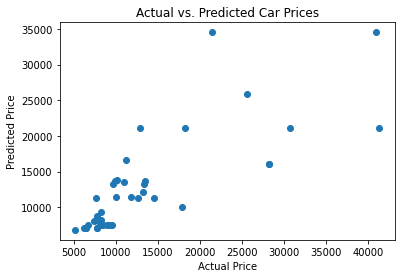

In [98]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs. Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.show()

Histogram: Distribution of Car Prices

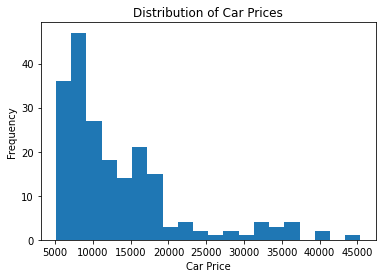

In [99]:
# Histogram: Distribution of Car Prices
plt.hist(data['price'], bins=20)
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

Line Plot: Model Performance

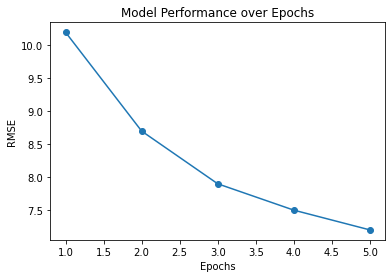

In [101]:
# Example code to plot performance metrics over epochs
epochs = [1, 2, 3, 4, 5]  # Example list of epochs
rmse_values = [10.2, 8.7, 7.9, 7.5, 7.2]  # Example list of RMSE values

plt.plot(epochs, rmse_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('Model Performance over Epochs')
plt.show()